In [35]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# load the dataset
df = pd.read_csv('req_names.csv')

In [37]:
print(df.head())

   Unnamed: 0                 ID          Name
0           0    Adriana Lima0_0  Adriana Lima
1           1  Adriana Lima101_3  Adriana Lima
2           2  Adriana Lima102_4  Adriana Lima
3           3  Adriana Lima103_5  Adriana Lima
4           4  Adriana Lima104_6  Adriana Lima


In [38]:
# drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

In [39]:
print(df)

                      ID          Name
0        Adriana Lima0_0  Adriana Lima
1      Adriana Lima101_3  Adriana Lima
2      Adriana Lima102_4  Adriana Lima
3      Adriana Lima103_5  Adriana Lima
4      Adriana Lima104_6  Adriana Lima
...                  ...           ...
17529   tom ellis96_4426     tom ellis
17530   tom ellis97_4427     tom ellis
17531   tom ellis98_4428     tom ellis
17532   tom ellis99_4429     tom ellis
17533    tom ellis9_4416     tom ellis

[17534 rows x 2 columns]


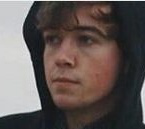

In [40]:
# displaying an image from the given path
from PIL import Image
img = Image.open('105_classes_pins_dataset/'+'pins_'+df['Name'][300]+'/'+df['ID'][300]+'.jpg')
img

In [41]:
# getting the resolution of the images from the dataset by iterating through the dataset
# and appending the resolution to a list
res = []
for i in range(len(df)):
    img = Image.open('105_classes_pins_dataset/'+'pins_'+df['Name'][i]+'/'+df['ID'][i]+'.jpg')
    res.append(img.size)

In [42]:
# printing the resolution of the images
print(res)

[(550, 668), (302, 320), (146, 155), (209, 225), (102, 108), (174, 184), (365, 387), (255, 266), (302, 320), (146, 155), (302, 320), (468, 547), (121, 128), (464, 558), (341, 558), (146, 154), (212, 225), (302, 320), (437, 462), (251, 266), (175, 184), (251, 266), (564, 802), (465, 554), (251, 266), (251, 270), (464, 547), (302, 320), (302, 320), (121, 128), (329, 387), (302, 320), (251, 266), (121, 129), (302, 320), (251, 266), (333, 387), (550, 550), (429, 554), (102, 108), (251, 266), (102, 108), (510, 547), (302, 320), (564, 799), (102, 108), (209, 221), (122, 128), (251, 266), (209, 221), (302, 320), (216, 264), (121, 129), (437, 456), (500, 559), (437, 463), (302, 320), (175, 184), (102, 108), (310, 387), (436, 462), (365, 387), (145, 154), (146, 152), (121, 128), (251, 266), (365, 387), (302, 320), (145, 154), (175, 184), (436, 463), (564, 802), (102, 108), (564, 668), (102, 108), (365, 387), (302, 320), (212, 221), (174, 184), (251, 266), (365, 387), (102, 108), (102, 108), (56

In [43]:
# appending the resolution to the dataframe as width and height
df['width'] = [i[0] for i in res]
df['height'] = [i[1] for i in res]

In [44]:
print(df)

                      ID          Name  width  height
0        Adriana Lima0_0  Adriana Lima    550     668
1      Adriana Lima101_3  Adriana Lima    302     320
2      Adriana Lima102_4  Adriana Lima    146     155
3      Adriana Lima103_5  Adriana Lima    209     225
4      Adriana Lima104_6  Adriana Lima    102     108
...                  ...           ...    ...     ...
17529   tom ellis96_4426     tom ellis    145     154
17530   tom ellis97_4427     tom ellis    146     154
17531   tom ellis98_4428     tom ellis    422     463
17532   tom ellis99_4429     tom ellis    251     266
17533    tom ellis9_4416     tom ellis    212     221

[17534 rows x 4 columns]


In [45]:
# displaying the number of images for each resolution combination
df.groupby(['width', 'height']).size()
# sorting them in descending order
df.groupby(['width', 'height']).size().sort_values(ascending=False)


width  height
102    108       2524
302    320       1528
251    266       1318
209    221       1032
365    387        926
                 ... 
264    298          1
263    387          1
256    320          1
255    320          1
302    282          1
Length: 691, dtype: int64

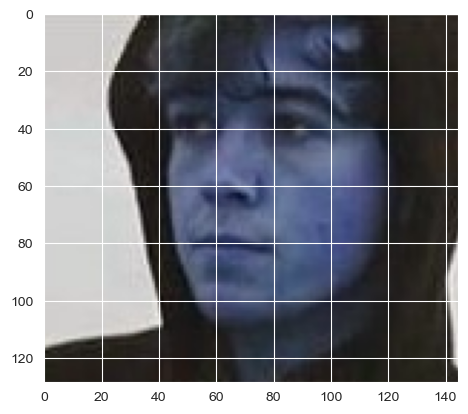

In [46]:
# displaying an image using opencv
import cv2
img = cv2.imread('105_classes_pins_dataset/'+'pins_'+df['Name'][300]+'/'+df['ID'][300]+'.jpg')
plt.imshow(img)

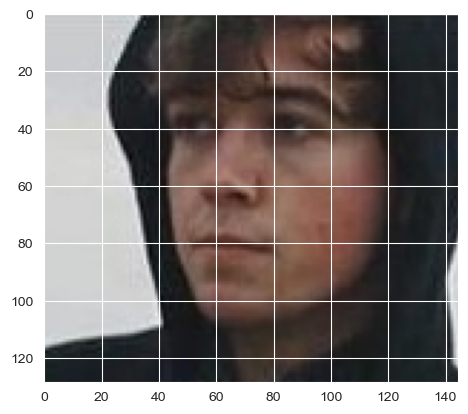

In [47]:
# fixing the colour channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [48]:
# getting all the images from the folder
import os
# getting all the images from the folder
images = []
for i in range(len(df)):
    img = cv2.imread('105_classes_pins_dataset/'+'pins_'+df['Name'][i]+'/'+df['ID'][i]+'.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
print(images)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [49]:
# slicing the first 10 images
images = images[:10]

In [50]:
# converting all the images to grayscale
gray_images = []
for i in range(len(images)):
    gray_images.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))
print(gray_images)


[array([[29, 29, 29, ..., 35, 34, 34],
       [29, 29, 29, ..., 35, 34, 34],
       [29, 29, 29, ..., 36, 35, 34],
       ...,
       [10,  6,  4, ..., 20, 20, 20],
       [ 9,  7,  5, ..., 20, 20, 20],
       [ 9,  7,  5, ..., 20, 20, 20]], dtype=uint8), array([[  9,   3,   6, ...,  59,  61,  62],
       [ 10,   5,   9, ...,  62,  63,  64],
       [ 11,   6,   9, ...,  64,  65,  66],
       ...,
       [142, 141, 147, ...,  55,  56,  58],
       [140, 140, 145, ...,  56,  57,  58],
       [143, 142, 145, ...,  55,  55,  56]], dtype=uint8), array([[ 26,  21,  19, ..., 161, 161, 160],
       [ 19,  19,  18, ..., 158, 160, 159],
       [ 18,  22,  16, ..., 159, 155, 153],
       ...,
       [ 15,  13,  17, ...,  18,  16,  15],
       [ 17,  14,  18, ...,  20,  19,  18],
       [ 19,  15,  17, ...,  22,  21,  20]], dtype=uint8), array([[105, 106, 107, ...,  56,  32,  46],
       [108, 108, 108, ...,  67,  43,  38],
       [109, 109, 108, ...,  69,  43,  36],
       ...,
       [ 49,  59, 

(184, 174)


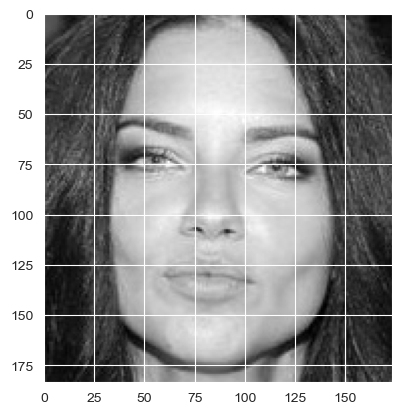

In [51]:
# printing a random image
plt.imshow(gray_images[5], cmap='gray')
# show the dimensions of the image
print(gray_images[5].shape)


In [52]:
# using frontal face recognition
# using frontal face recognition to detect the faces in the images
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
faces = []
for i in range(len(gray_images)):
    faces.append(face_cascade.detectMultiScale(gray_images[i], 1.001, 4))
print(faces)


[array([[ 56,  91, 459, 459]], dtype=int32), array([[ 32,  45, 219, 219],
       [ 24, 273,  41,  41]], dtype=int32), array([[ 19,  20, 102, 102]], dtype=int32), array([[ 56, 144,  79,  79],
       [ 17,  29, 159, 159]], dtype=int32), array([[ 9, 14, 80, 80]], dtype=int32), array([[ 18,  23, 135, 135]], dtype=int32), array([[ 23,  39, 277, 277]], dtype=int32), array([[ 28,  32, 194, 194]], dtype=int32), array([[ 29,  47, 229, 229]], dtype=int32), array([[  8,  20, 117, 117]], dtype=int32)]


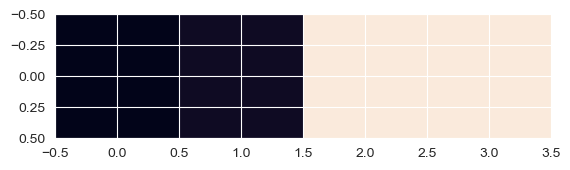

In [53]:
# printing an image with the detected face
plt.imshow(faces[5])